<a href="https://colab.research.google.com/github/macgyver121/DADS7202_final_project/blob/main/live_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install -q transformers datasets
!pip install -q pytorch-lightning wandb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (5,224 kB/s)
debconf: unable to initi

     |████████████████████████████████| 5.8 MB 24.5 MB/s 
     |████████████████████████████████| 452 kB 76.8 MB/s 
     |████████████████████████████████| 7.6 MB 65.2 MB/s 
     |████████████████████████████████| 182 kB 82.3 MB/s 
     |████████████████████████████████| 212 kB 66.2 MB/s 
     |████████████████████████████████| 132 kB 63.7 MB/s 
     |████████████████████████████████| 127 kB 66.8 MB/s 
     |████████████████████████████████| 800 kB 22.0 MB/s 
     |████████████████████████████████| 1.9 MB 59.1 MB/s 
     |████████████████████████████████| 512 kB 57.8 MB/s 
     |████████████████████████████████| 125 kB 56.5 MB/s 
     |████████████████████████████████| 182 kB 66.2 MB/s 
     |████████████████████████████████| 174 kB 50.1 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 173 kB 63.2 MB/s 
     |████████████████████████████████| 168 kB 78.6 MB/s 
     |████████████████████████████████| 168 kB 54.4 MB/s 
     |██████████

In [ ]:
import os
os.kill(os.getpid(), 9)

In [5]:
import cv2
import pytesseract
import shutil
import os
import random
from PIL import Image

import re
import csv
import os

import pyarrow as pa
from datasets import DatasetDict
from datasets.arrow_dataset import Dataset
from transformers import AutoTokenizer, AutoModelWithLMHead, AutoModelForSeq2SeqLM

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


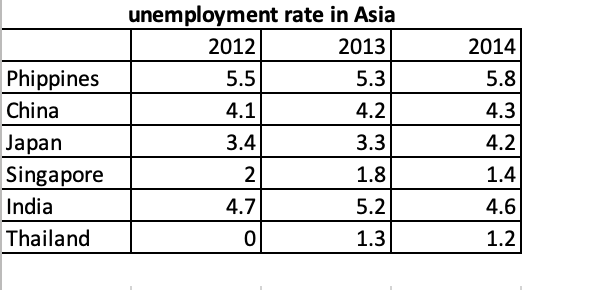

In [10]:
src = '/content/drive/MyDrive/DADS7202_final/IELTS/table/'+str(171)+'.png'  ## change imagge here
from IPython.display import Image, display
display(Image(src))

In [11]:
img = cv2.imread(src)
# Adding custom options
custom_config = r'--psm 1'
text = pytesseract.image_to_string(img, config=custom_config)
#print(text)
text_split = text.split('\n')
#print(text_split)
while '' in text_split:
    text_split.remove('')
while ' ' in text_split:
    text_split.remove(' ')
key = ' '.join(text_split[:-2])
print(key)

unemployment rate in Asia 2012 2013 2014 Phippines 5.5 5.3 5.8 China 41 42 43 Japan 3.4 3.3 4.2 Singapore 2 1.8 1.4 India 47 5.2 46


In [9]:
save_directory = "/content/drive/MyDrive/DADS7202_final/model2-t5base-4000d-100e-256-v1" ## edit model
model = AutoModelForSeq2SeqLM.from_pretrained(save_directory)
tokenizer = AutoTokenizer.from_pretrained("gagan3012/k2t-base")  ## edit tokenizer
# prepare for the model
input_ids = tokenizer(key, return_tensors='pt').input_ids
# generate
outputs = model.generate(input_ids,min_length=150, max_length=200)
print("Generated :", tokenizer.decode(outputs[0], skip_special_tokens=True))

Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Generated : The chart shows the unemployment rate in Asia from 2012 to 2014, with projections for the next three years. In 2012, the highest unemployment rate was in the Phippines, with a rate of 5.5. In 2014, the highest rate was in the Philippines, with a rate of 5.8. In 2014, the highest rate was in the Philippines, with a rate of 5.3. In 2012, the highest rate was in the Philippines, with a rate of 5.3. In 2014, the highest rate was in the Philippines, with a rate of 5.5 in 2012 and 5.3 in 2014. In 2014, the lowest rate was in the Philippines, with a rate of 5.3 in 2013. In 2014, the highest rate was in the Philippines, with a rate of 5.3 in the Philippines. In 2014, the lowest rate was in the Philippines, with 5.3 in the Philippines. In 2014, the lowest rate was in China, with 


In [14]:
print("Key :", key)
f = open('/content/drive/MyDrive/DADS7202_final/IELTS/captions/'+str(171)+'.txt', 'r')  ## change text here
content = f.read()
content = re.sub('\s+',' ',content)
text = content
print("Original text :", text)
print("Generated :", tokenizer.decode(outputs[0], skip_special_tokens=True))

Key : unemployment rate in Asia 2012 2013 2014 Phippines 5.5 5.3 5.8 China 41 42 43 Japan 3.4 3.3 4.2 Singapore 2 1.8 1.4 India 47 5.2 46
Original text : In all three years, unemployment was highest in the Philippines. The unemployment rate in the Philippines peaked at nearly 6 percent in 2014. Unemployment was second highest in India for all three years. Third came unemployment in China. Unemployment in Japan was fourth highest, and very close to China’s rate of unemployment in 2014—around 4.25 percent. Singapore had the second to lowest unemployment rates for all three years. Data was not available for Thailand in 2012, but in 2013 and 2014 it had the lowest unemployment rates of all six countries. Unemployment was at its lowest in 2014 in Thailand, when it was below 1.25 percent. For Thailand, India, and Singapore, unemployment was lowest in 2014. For the Philippines, China, and Japan, unemployment was highest in that same year.
Generated : The chart shows the unemployment rate in A